In [21]:
import numpy as np
from numpy import random as rnd, linalg as la

import scipy as sp
from scipy import linalg
from matplotlib import pyplot as plt

import seaborn as sns

%matplotlib inline

In [7]:
N = 1000
gauss_coeffs = np.random.randn(1000) * 1000
coeffs = np.random.randn(1000) * 1000

In [8]:
exps = [lambda: rnd.normal(loc=mu, scale=1.0) for mu in gauss_coeffs]

In [52]:
def sum_of_exps(gauss_coeffs, coeffs, exps, vector=False, batch_size=1000):
    N = len(exps)
    if not vector:
        evaluate = np.zeros(N)
        for i, exp in enumerate(exps):
            evaluate[i] = exp()
        first_part = coeffs @ evaluate
        second_part = coeffs @ evaluate
        return first_part + second_part
    else:
        evaluate = np.zeros_like(N, batch_size)
        for i, exp in enumerate(exps):
            evaluate[i, :] = exp()
        first_part = coeffs @ evaluate
        second_part = np.sum(coeffs[:, None] * evaluate, ax)

def n_sum_of_exps(gauss_coeffs, coeffs, n_call, batch_size=10000):
    batch_size=10000
    exp_funcs = 
    evaluate = np.zeros_like(N, batch_size)
    for i, exp in enumerate(exps):
        evaluate[i, :] = exp()
    first_part = coeffs @ evaluate

In [53]:
%timeit sum_of_exps(gauss_coeffs, coeffs, exps)

1000 loops, best of 3: 942 µs per loop


In [54]:
values = np.array([sum_of_exps(gauss_coeffs, coeffs, exps) for _ in range(10000)])

In [55]:
values = np.array(values)

In [56]:
values.shape

(10000,)

/Users/cnst/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


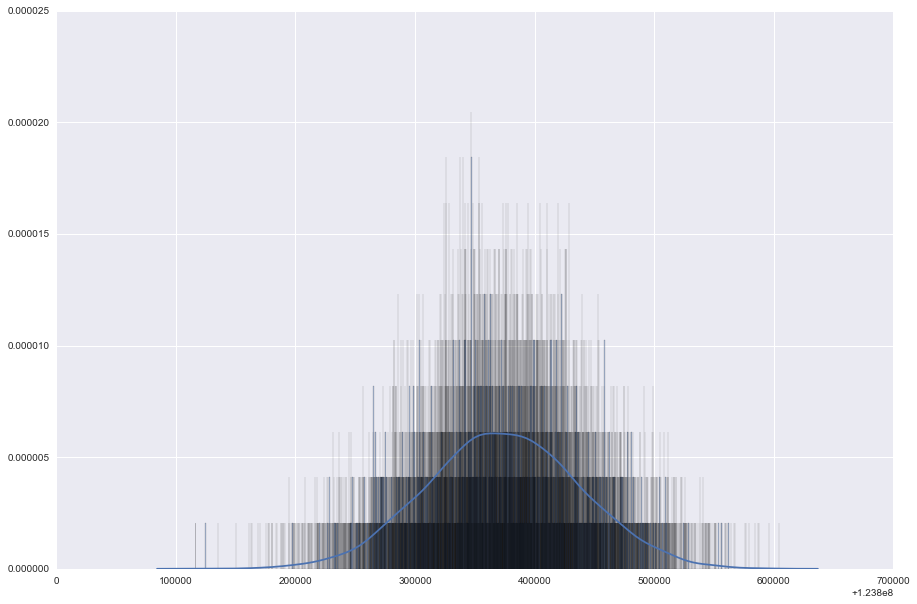

In [57]:
plt.figure(figsize=(15, 10))
sns.distplot(values, bins=len(values)//1)

In [48]:
a = rnd.randn(50)

In [49]:
np.sum(np.outer(a, a))

15.308739690098117

In [50]:
np.sum(a)**2

15.30873969009814

In [51]:
np.sum(np.kron(a, a))

15.308739690098117

In [10]:
n_mat = 50
res = [np.zeros((n_mat, n_mat)) for n in range(10, 110, 10)]
for n, r in zip(range(10, 110, 10), res):
    idd = np.eye(n)
    mats = [la.qr(np.random.randn(n, n) + 1j * np.random.randn(n, n))[0] for _ in range(n_mat)]
    for i in range(n_mat):
        for j in range(n_mat):
            temp = mats[i].dot(mats[j])
            r[i, j] = la.norm(np.conj(temp).T.dot(temp) - idd)

In [11]:
print([np.mean(r) for r in res])

[2.2943032977432504e-15, 3.9884300074968426e-15, 5.5932832392799746e-15, 7.174236297990232e-15, 8.7665148801024664e-15, 1.0252109018354005e-14, 1.1774981981406945e-14, 1.3114364831883191e-14, 1.4632493025646669e-14, 1.5902019956200896e-14]


In [30]:
n = 100
x = 1000 *np.random.randn(n, n) + 1000j * np.random.randn(n, n)
xhskew = 0.5 * (x - np.conj(x).T)

In [31]:
u = sp.linalg.expm(xhskew)

In [32]:
np.conj(u).T @ u

array([[  1.00000000e+00 +0.00000000e+00j,
         -2.93376434e-14 +1.96197225e-15j,
         -4.78228568e-14 +1.34892097e-14j, ...,
          2.66453526e-15 +4.02108902e-14j,
         -4.88949159e-14 -2.63157551e-14j,
         -5.17433318e-14 +1.67509236e-15j],
       [ -2.93376434e-14 -1.96197225e-15j,
          1.00000000e+00 +0.00000000e+00j,
          1.53835278e-14 -1.51822999e-14j, ...,
          3.76920717e-14 +9.11770659e-14j,
          2.09242346e-14 +9.44383460e-15j,
         -4.34444147e-14 +6.01602101e-15j],
       [ -4.78228568e-14 -1.34892097e-14j,
          1.53835278e-14 +1.51822999e-14j,
          1.00000000e+00 +0.00000000e+00j, ...,
          5.09037257e-14 +1.69491157e-14j,
         -7.80382703e-14 -3.35599604e-14j,
          4.80518403e-14 +9.75573788e-14j],
       ..., 
       [  2.66453526e-15 -4.02108902e-14j,
          3.76920717e-14 -9.11770659e-14j,
          5.09037257e-14 -1.69491157e-14j, ...,
          1.00000000e+00 +0.00000000e+00j,
         -8.027606

In [37]:
v = la.qr(rnd.randn(n, n) + 1j * rnd.randn(n, n))[0]

In [38]:
w = u @ v

In [39]:
w.shape

(100, 100)

In [40]:
np.conj(w).T @ w

array([[  1.00000000e+00 +0.00000000e+00j,
         -1.29098121e-14 +2.65343303e-14j,
         -7.33441086e-15 -2.47059317e-14j, ...,
          2.70131140e-14 +1.40894241e-13j,
          1.76698933e-14 -5.88834537e-14j,
         -2.97123437e-14 +9.97119054e-15j],
       [ -1.29098121e-14 -2.65343303e-14j,
          1.00000000e+00 +0.00000000e+00j,
         -1.73194792e-14 +6.19435059e-14j, ...,
         -5.85746729e-14 -2.32452946e-15j,
         -3.08086889e-14 -1.38569711e-14j,
          1.57894531e-14 -5.01890196e-14j],
       [ -7.33441086e-15 +2.47059317e-14j,
         -1.73194792e-14 -6.19435059e-14j,
          1.00000000e+00 +0.00000000e+00j, ...,
         -2.93896851e-14 +1.97897254e-14j,
         -6.69048150e-14 -4.26880753e-14j,
         -1.10675358e-14 +1.80775533e-14j],
       ..., 
       [  2.70131140e-14 -1.40894241e-13j,
         -5.85746729e-14 +2.32452946e-15j,
         -2.93896851e-14 -1.97897254e-14j, ...,
          1.00000000e+00 +0.00000000e+00j,
          2.438500